In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def extractBlocksFromImage(image, blockSize, stride):
    """
    Divide la imagen en bloques y extrae la magnitud y el ángulo del gradiente para cada bloque.

    :param image: Imagen de entrada.
    :param blockSize: El tamaño de los bloques (e.g., 16x16).
    :param stride: La distancia entre bloques consecutivos (e.g., 8).
    :return: Dos listas de arrays numpy, una para los bloques de magnitud y otra para los de ángulo.
    """
    # Calcular el gradiente de la imagen
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    mag, ang = cv2.cartToPolar(sobelx, sobely)

    # Calcular el número de bloques vertical y horizontalmente
    M = (mag.shape[0] - blockSize) // stride + 1
    N = (mag.shape[1] - blockSize) // stride + 1

    # Inicializar las listas para guardar bloques de magnitud y ángulo
    blocksMag = []
    blocksAng = []

    # Iterar sobre la imagen extrayendo bloques
    for i in range(0, M * stride, stride):
        for j in range(0, N * stride, stride):
            # Extraer bloques y añadir a las listas
            blocksMag.append(mag[i:i+blockSize, j:j+blockSize])
            blocksAng.append(ang[i:i+blockSize, j:j+blockSize])

    return blocksMag, blocksAng

In [8]:
def visualize_histograms_from_image(image, blockSize, stride):
    """
    Genera una representación visual de los histogramas de los bloques de una imagen.

    :param image: Imagen de entrada.
    :param blockSize: El tamaño de los bloques.
    :param stride: La distancia entre bloques consecutivos.
    """
    blocksMag, blocksAng = extractBlocksFromImage(image, blockSize, stride)

    # Inicializar la matriz de direcciones con fondo negro
    direction_image = np.zeros((blockSize, blockSize))

    for i in range(len(blocksMag)):
        # Calcular el histograma del bloque actual
        hist, _ = np.histogram(blocksAng[i].flatten(), bins=9, range=(0, 180), weights=blocksMag[i].flatten())

        # Calcular el centroide de cada bin del histograma
        bin_centers = np.linspace(0, 180, 10)[:-1] + 90 / 9

        # Dibujar líneas en la matriz de direcciones según el histograma
        for j in range(len(hist)):
            magnitude = hist[j]
            angle = bin_centers[j]
            x = int(blockSize // 2 + magnitude * np.cos(np.radians(angle)))
            y = int(blockSize // 2 + magnitude * np.sin(np.radians(angle)))
            cv2.line(direction_image, (blockSize // 2, blockSize // 2), (x, y), int(hist[j]), thickness=1)

    # Mostrar la imagen resultante
    plt.imshow(direction_image, cmap='gray')
    plt.axis('off')
    plt.show()

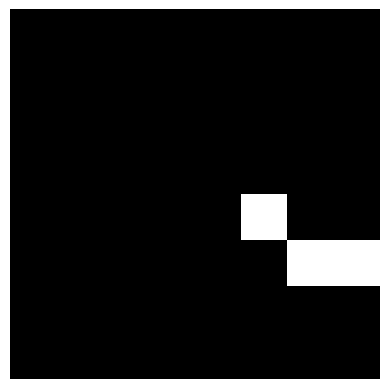

In [10]:
blockSize = 8
stride = 8
image = cv2.imread('./assets/person.png', cv2.IMREAD_GRAYSCALE)

visualize_histograms_from_image(image, blockSize, stride)